In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
w = np.load('w_windows.npy')
n = np.load('n_windows.npy')

In [3]:
from scipy.stats import skew, kurtosis
from numba import jit

fs = 256
jw = fs//.25

@jit(nopython=True)
def energy(x):
    return np.sum(np.abs(x)**2)

@jit(nopython=True)
def mpp(x):
    return np.array([np.mean(x[:,i]) for i in range(len(x[0]))])

def curtose(s, j):
    m = np.zeros((21,len(j)-1))
    for i in range(len(m)):
        m[i] = np.array([kurtosis(s[i,j[ii]:j[ii+1]]) for ii in range(len(j)-1)])
    return mpp(m)

def assimetria(s, j):
    m = np.zeros((21,len(j)-1))
    for i in range(len(m)):
        m[i] = np.array([skew(s[i,j[ii]:j[ii+1]]) for ii in range(len(j)-1)])
    return mpp(m)
    
def variancia(s, j):
    m = np.zeros((21,len(j)-1))
    for i in range(len(m)):
        m[i] = np.array([np.var(s[i,j[ii]:j[ii+1]]) for ii in range(len(j)-1)])
    return mpp(m)

def energia(s, j):
    m = np.zeros((21,len(j)-1))
    for i in range(len(m)):
        m[i] = np.array([energy(s[i,j[ii]:j[ii+1]]) for ii in range(len(j)-1)])
    return mpp(m)

janela = lambda jfs,s:np.array([i*jfs for i in range(s//jfs+1)])

In [4]:
jc = janela(int(jw),len(w[0]))
    
c = curtose(w,jc)
a = assimetria(w,jc)
v = variancia(w,jc)
e = energia(w,jc)
    
w_features = np.array([c,a,v,e])
    
    


In [5]:
w_features.shape

(4, 259)

In [6]:
jc = janela(int(jw),len(n[0]))
    
c = curtose(n,jc)
a = assimetria(n,jc)
v = variancia(n,jc)
e = energia(n,jc)
    
n_features = np.array([c,a,v,e])

In [7]:
n_features.shape

(4, 259)

## Visualização de gráficos

In [8]:
col = ['Kurtosis','Skewness','Variance','Energy']
data = pd.DataFrame(np.hstack((w_features,n_features)).T,columns=col)
y = np.hstack((np.repeat('Yes',w_features.shape[1]),np.repeat('No',w_features.shape[1])))
data['Class'] = y
data.head()

,Kurtosis,Skewness,Variance,Energy,Class
0,-0.328076,-0.077258,147.078173,569070.030580,Yes
1,-0.142144,0.084088,172.508621,456047.834981,Yes
2,0.345239,-0.286419,148.805326,437818.182678,Yes
3,-0.249455,0.070377,191.716284,515348.798529,Yes
4,-0.484901,0.036083,207.704409,534405.036907,Yes


<IPython.core.display.Javascript object>


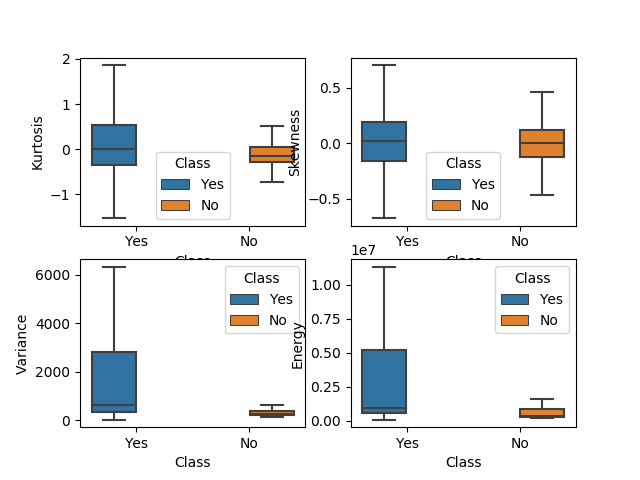

In [10]:
%matplotlib notebook
fig, ax = plt.subplots(2,2)

sns.boxplot(x="Class", y="Kurtosis", hue="Class",data=data,ax=ax[0,0],showfliers=False)
sns.boxplot(x="Class", y="Skewness", hue="Class",data=data,ax=ax[0,1],showfliers=False)
sns.boxplot(x="Class", y="Variance", hue="Class",data=data,ax=ax[1,0],showfliers=False)
sns.boxplot(x="Class", y="Energy", hue="Class",data=data,ax=ax[1,1],showfliers=False)

<IPython.core.display.Javascript object>


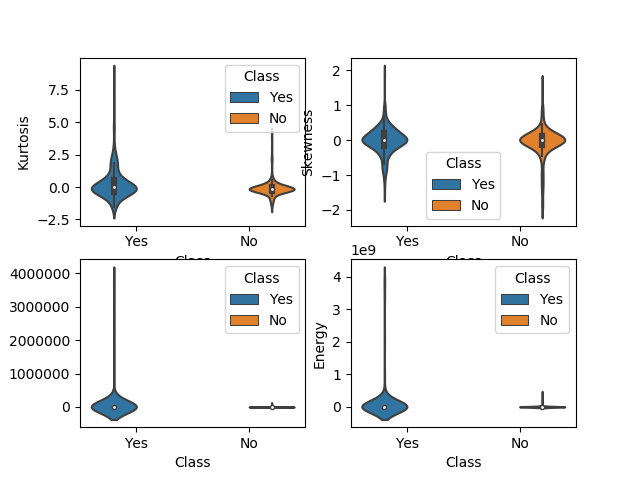